
Buying Prices for TSLA - Weekly Data:
40    245.42
71    328.33
92    299.68
130   213.97
160   248.48
Name: Close, dtype: float64


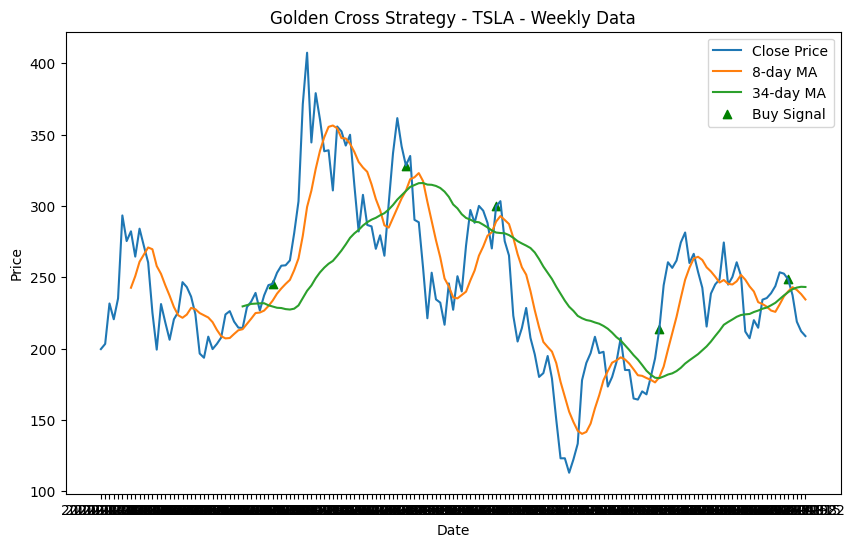


Buying Prices for AAPL - Weekly Data:
90    163.62
118   148.50
155   189.97
Name: Close, dtype: float64


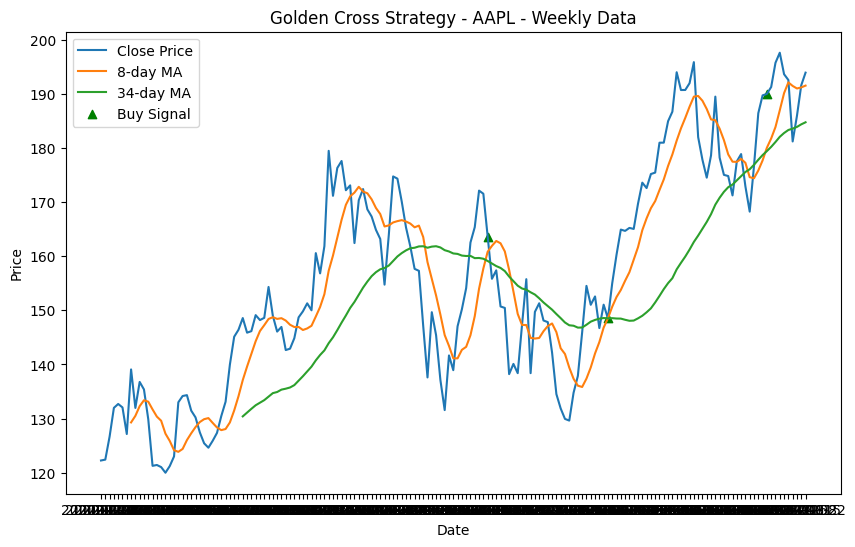


Buying Prices for GOOGL - Weekly Data:
122   108.42
Name: Close, dtype: float64


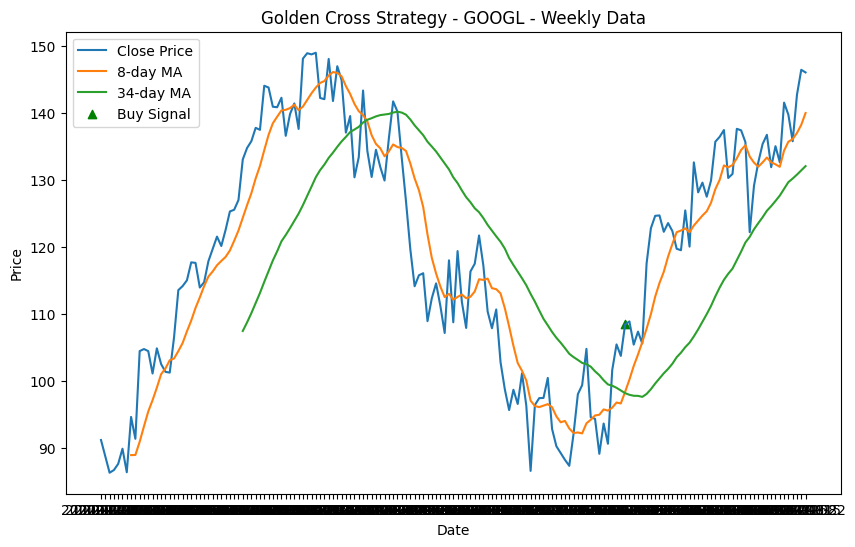


Buying Prices for MSFT - Weekly Data:
117   255.29
Name: Close, dtype: float64


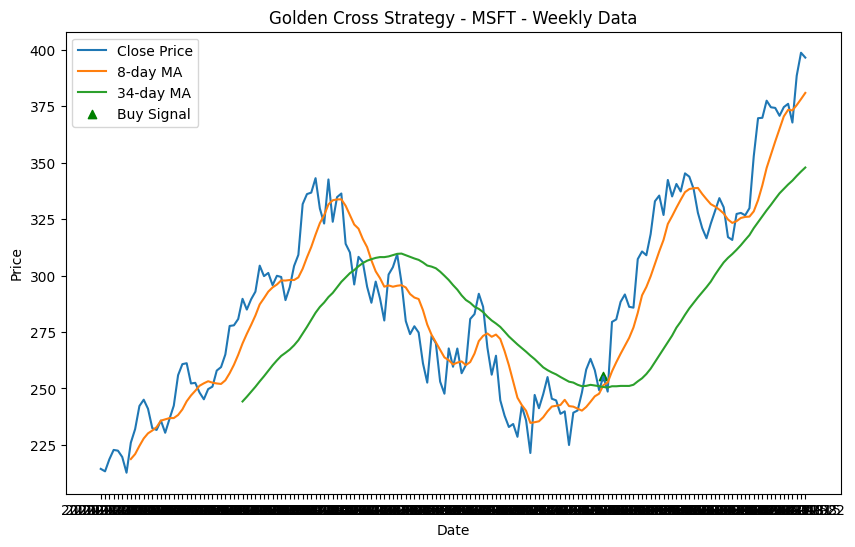


Buying Prices for TCS.NS - Weekly Data:
105   3,292.75
137   3,368.30
Name: Close, dtype: float64


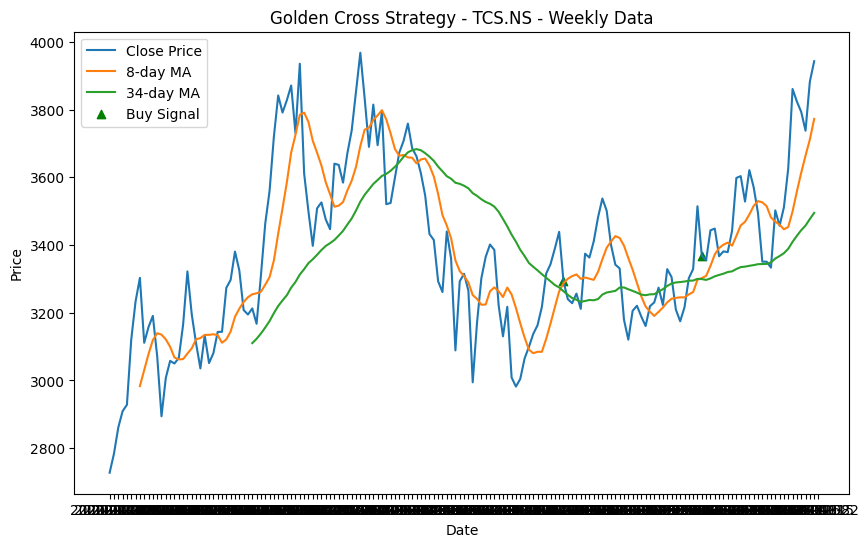


Buying Prices for TATAMOTORS.NS - Weekly Data:
45    497.60
89    471.00
117   428.00
Name: Close, dtype: float64


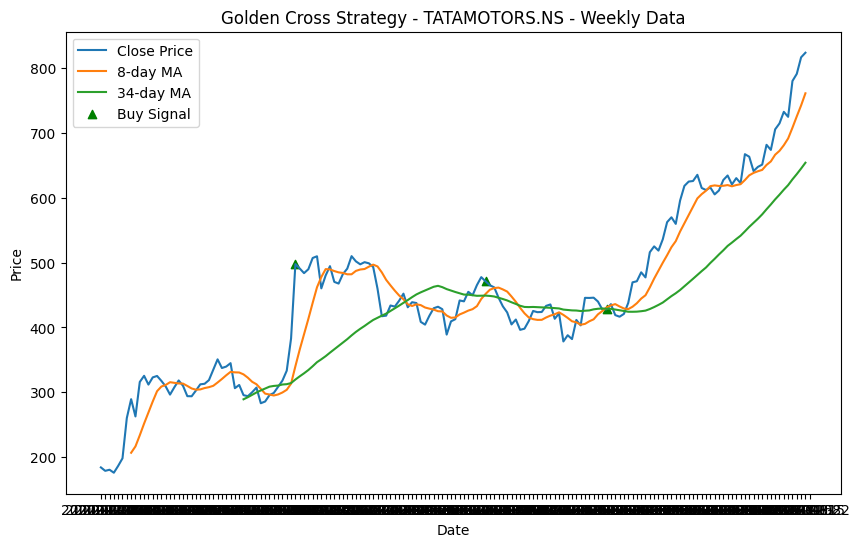


Monthly Data:
           Date   Open   High    Low  Close  Adj Close      Volume  \
0    2020-12-01 199.20 239.57 180.40 235.22     235.22  3589038000   
1    2021-01-01 239.82 300.13 239.06 264.51     264.51  2117084400   
2    2021-02-01 271.43 293.50 206.33 225.17     225.17  1568573700   
3    2021-03-01 230.04 240.37 179.83 222.64     222.64  2827357200   
4    2021-04-01 229.46 260.26 219.81 236.48     236.48  2035619100   
..          ...    ...    ...    ...    ...        ...         ...   
227  2023-09-01 604.20 647.00 601.90 630.20     630.20   182497184   
228  2023-10-01 630.20 677.80 608.30 628.65     628.65   215850154   
229  2023-11-01 630.00 717.25 626.30 706.40     706.40   218144440   
230  2023-12-01 708.00 802.90 696.25 779.95     779.95   214351607   
231  2024-01-01 785.00 827.00 776.25 823.55     823.55   149668786   

            Ticker  
0             TSLA  
1             TSLA  
2             TSLA  
3             TSLA  
4             TSLA  
..             ...

In [22]:
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt

def download_stock_data(ticker, interval):
    period1 = int(time.mktime(datetime.date(2020, 12, 1).timetuple()))
    period2 = int(time.mktime(datetime.date.today().timetuple()))
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events-history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    return df

def golden_cross_strategy(df):
    # Calculate 8-day and 34-day moving averages
    df['MA8'] = df['Close'].rolling(window=8).mean()
    df['MA34'] = df['Close'].rolling(window=34).mean()

    # Generate signals
    df['Signal'] = 0  # 0 represents no signal
    df.loc[df['MA8'] > df['MA34'], 'Signal'] = 1  # 1 represents buy signal
    df.loc[df['MA8'] < df['MA34'], 'Signal'] = -1  # -1 represents sell signal

    # Identify buying prices
    buy_signals = df[(df['Signal'] == 1) & (df['Signal'].shift(1) == -1)]
    buying_prices = buy_signals['Close']

    return buying_prices

# List of stock tickers
stock_tickers = ['TSLA', 'AAPL', 'GOOGL', 'MSFT', 'TCS.NS', 'TATAMOTORS.NS']  # Add more tickers as needed

# Create empty DataFrames to store data
monthly_dataframes = []
weekly_dataframes = []

# Iterate over each ticker and download data for both weekly and monthly intervals
for ticker in stock_tickers:
    # Download monthly data
    monthly_data = download_stock_data(ticker, "1mo")
    monthly_data['Ticker'] = ticker
    monthly_dataframes.append(monthly_data)
    
    # Download weekly data
    weekly_data = download_stock_data(ticker, "1wk")
    weekly_data['Ticker'] = ticker
    weekly_dataframes.append(weekly_data)

    # Implement golden cross strategy for weekly data
    buying_prices = golden_cross_strategy(weekly_data)

    # Print buying prices for each stock
    print(f"\nBuying Prices for {ticker} - Weekly Data:")
    print(buying_prices)

    # Plot the closing prices and moving averages
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_data['Date'], weekly_data['Close'], label='Close Price')
    plt.plot(weekly_data['Date'], weekly_data['MA8'], label='8-day MA')
    plt.plot(weekly_data['Date'], weekly_data['MA34'], label='34-day MA')
    plt.scatter(buying_prices.index, buying_prices, marker='^', color='g', label='Buy Signal')
    plt.title(f'Golden Cross Strategy - {ticker} - Weekly Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Concatenate dataframes for each time period
all_monthly_data = pd.concat(monthly_dataframes, ignore_index=True)
all_weekly_data = pd.concat(weekly_dataframes, ignore_index=True)

# Resetting index
all_monthly_data.reset_index(drop=True, inplace=True)
all_weekly_data.reset_index(drop=True, inplace=True)

# Print the combined DataFrames
print("\nMonthly Data:")
print(all_monthly_data)

print("\nWeekly Data:")
print(all_weekly_data)


In [23]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
 
pd.options.display.float_format = "{:,.2f}".format

In [31]:
import time
import datetime
import pandas as pd

def download_stock_data(tickers, interval):
    dataframes = []
    
    for ticker in tickers:
        period1 = int(time.mktime(datetime.date(2020, 12, 1).timetuple()))
        period2 = int(time.mktime(datetime.date.today().timetuple()))
        
        query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events-history&includeAdjustedClose=true'
        
        df = pd.read_csv(query_string)
        dataframes.append(df)
    
    return dataframes

# Example usage
tickers = ['TSLA', 'AAPL', 'GOOGL', 'MSFT', 'TCS.NS', 'TATAMOTORS.NS']
interval = "1mo"

stock_dataframes = download_stock_data(tickers, interval)

# Access dataframes for individual tickers
for i, ticker in enumerate(tickers):
    print(f"\nStock Data for {ticker}:")
    print(stock_dataframes[i].head())



Stock Data for TSLA:
         Date   Open   High    Low  Close  Adj Close      Volume
0  2020-12-01 199.20 239.57 180.40 235.22     235.22  3589038000
1  2021-01-01 239.82 300.13 239.06 264.51     264.51  2117084400
2  2021-02-01 271.43 293.50 206.33 225.17     225.17  1568573700
3  2021-03-01 230.04 240.37 179.83 222.64     222.64  2827357200
4  2021-04-01 229.46 260.26 219.81 236.48     236.48  2035619100

Stock Data for AAPL:
         Date   Open   High    Low  Close  Adj Close      Volume
0  2020-12-01 121.01 138.79 120.01 132.69     130.39  2322189600
1  2021-01-01 133.52 145.09 126.38 131.96     129.67  2240262000
2  2021-02-01 133.75 137.88 118.39 121.26     119.16  1833855600
3  2021-03-01 123.75 128.72 116.21 122.15     120.21  2650418200
4  2021-04-01 123.66 137.07 122.49 131.46     129.37  1889857500

Stock Data for GOOGL:
         Date   Open   High    Low  Close  Adj Close     Volume
0  2020-12-01  88.33  92.19  84.70  87.63      87.63  608630000
1  2021-01-01  88.00  96.

In [32]:
for i, ticker in enumerate(tickers):
    print(f"\nStock Data for {ticker}:")
    print(stock_dataframes[i].describe())


Stock Data for TSLA:
        Open   High    Low  Close  Adj Close           Volume
count  39.00  39.00  39.00  39.00      39.00            39.00
mean  249.39 276.77 212.20 247.91     247.91 2,103,468,013.15
std    58.10  59.87  45.99  55.04      55.04   791,318,372.57
min   118.47 180.68 101.81 123.18     123.18   116,620,813.00
25%   210.76 236.37 186.37 208.80     208.80 1,564,169,700.00
50%   239.82 265.13 206.86 240.08     240.08 1,947,334,500.00
75%   272.00 306.97 237.67 266.34     266.34 2,547,873,200.00
max   386.90 414.50 326.20 381.59     381.59 3,897,499,400.00

Stock Data for AAPL:
        Open   High    Low  Close  Adj Close           Volume
count  39.00  39.00  39.00  39.00      39.00            39.00
mean  156.49 166.37 147.32 158.31     157.05 1,612,648,042.56
std    22.02  20.67  21.17  22.53      23.02   502,797,630.14
min   121.01 128.72 116.21 121.26     119.16    55,803,260.00
25%   137.41 151.33 130.82 139.85     138.45 1,314,819,150.00
50%   155.08 165.00 143.90

In [33]:
for i, ticker in enumerate(tickers):
    print(f"\nStock Data for {ticker}:")
    print(stock_dataframes[i].info())


Stock Data for TSLA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       39 non-null     object 
 1   Open       39 non-null     float64
 2   High       39 non-null     float64
 3   Low        39 non-null     float64
 4   Close      39 non-null     float64
 5   Adj Close  39 non-null     float64
 6   Volume     39 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.3+ KB
None

Stock Data for AAPL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       39 non-null     object 
 1   Open       39 non-null     float64
 2   High       39 non-null     float64
 3   Low        39 non-null     float64
 4   Close      39 non-null     float64
 5   Adj Close  39 non-null     float64
 6   

In [34]:
def process_stock_data(dataframes):
    processed_dataframes = []
    
    for df in dataframes:
        # Selecting Date and Adjusted Close columns
        df = df[['Date', 'Adj Close']]
        # Renaming columns
        df.columns = ['ds', 'y']
        processed_dataframes.append(df)
    
    return processed_dataframes





# Process the stock data
processed_dataframes = process_stock_data(stock_dataframes)

# Access processed dataframes for individual tickers
for i, ticker in enumerate(tickers):
    print(f"\nProcessed Stock Data for {ticker}:")
    print(processed_dataframes[i].head(10))


Processed Stock Data for TSLA:
           ds      y
0  2020-12-01 235.22
1  2021-01-01 264.51
2  2021-02-01 225.17
3  2021-03-01 222.64
4  2021-04-01 236.48
5  2021-05-01 208.41
6  2021-06-01 226.57
7  2021-07-01 229.07
8  2021-08-01 245.24
9  2021-09-01 258.49

Processed Stock Data for AAPL:
           ds      y
0  2020-12-01 130.39
1  2021-01-01 129.67
2  2021-02-01 119.16
3  2021-03-01 120.21
4  2021-04-01 129.37
5  2021-05-01 122.63
6  2021-06-01 135.01
7  2021-07-01 143.79
8  2021-08-01 149.67
9  2021-09-01 139.70

Processed Stock Data for GOOGL:
           ds      y
0  2020-12-01  87.63
1  2021-01-01  91.37
2  2021-02-01 101.10
3  2021-03-01 103.13
4  2021-04-01 117.68
5  2021-05-01 117.84
6  2021-06-01 122.09
7  2021-07-01 134.73
8  2021-08-01 144.70
9  2021-09-01 133.68

Processed Stock Data for MSFT:
           ds      y
0  2020-12-01 216.60
1  2021-01-01 225.89
2  2021-02-01 226.30
3  2021-03-01 230.13
4  2021-04-01 246.15
5  2021-05-01 243.71
6  2021-06-01 265.03
7  2021-07

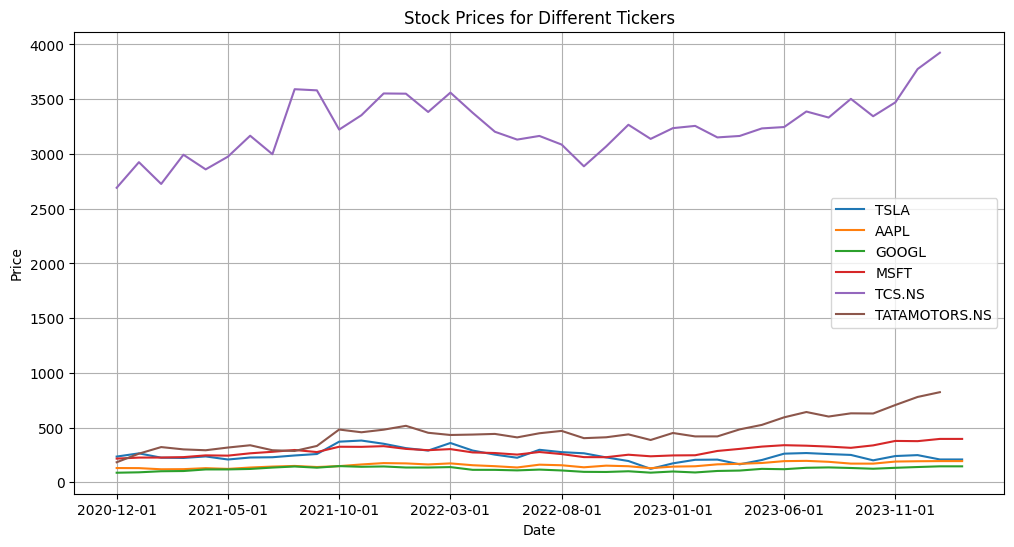

In [35]:
for i, ticker in enumerate(tickers):
    df = processed_dataframes[i]
    df.set_index('ds').y.plot(figsize=(12,6), grid=True, label=ticker);

plt.legend()
plt.title('Stock Prices for Different Tickers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [42]:
# Define a function to create a future DataFrame with specific weekdays
def create_future_dataframe_with_weekdays(model, periods):
    future = model.make_future_dataframe(periods=periods, freq='d')

    # Filter weekdays
    future_boolean = future['ds'].map(lambda x: True if x.weekday() in range(0, 5) else False)
    future = future[future_boolean]

    return future

In [43]:
# Define a function to fit and predict using Prophet model
def fit_and_predict_prophet(stock_df):
    # Initialize Prophet model
    model = Prophet()
    
    # Rename columns to 'ds' and 'y'
    stock_df.columns = ['ds', 'y']
    
    # Fit the model
    model.fit(stock_df)
    
    # Create a future DataFrame with specific weekdays
    future = create_future_dataframe_with_weekdays(model, periods=1095)
    
    # Make predictions
    forecast = model.predict(future)
    
    return forecast


In [44]:
# Example usage
forecasts = []

for i, ticker in enumerate(tickers):
    # Select the processed DataFrame for the current ticker
    stock_df = processed_dataframes[i]
    
    # Fit and predict using Prophet model
    forecast = fit_and_predict_prophet(stock_df)
    
    # Append the forecast to the list
    forecasts.append(forecast)

# Access forecasts for individual tickers
for i, ticker in enumerate(tickers):
    print(f"\nForecast for {ticker}:")
    print(forecasts[i][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

09:57:06 - cmdstanpy - INFO - Chain [1] start processing
09:57:06 - cmdstanpy - INFO - Chain [1] done processing
09:57:07 - cmdstanpy - INFO - Chain [1] start processing
09:57:08 - cmdstanpy - INFO - Chain [1] done processing
09:57:09 - cmdstanpy - INFO - Chain [1] start processing
09:57:09 - cmdstanpy - INFO - Chain [1] done processing
09:57:10 - cmdstanpy - INFO - Chain [1] start processing
09:57:11 - cmdstanpy - INFO - Chain [1] done processing
09:57:12 - cmdstanpy - INFO - Chain [1] start processing
09:57:13 - cmdstanpy - INFO - Chain [1] done processing
09:57:14 - cmdstanpy - INFO - Chain [1] start processing
09:57:14 - cmdstanpy - INFO - Chain [1] done processing



Forecast for TSLA:
            ds    yhat  yhat_lower  yhat_upper
803 2027-01-08  -89.54     -147.13      -32.92
804 2027-01-11 -107.99     -163.31      -50.95
805 2027-01-12 -101.10     -155.90      -44.80
806 2027-01-13  -88.27     -145.88      -24.43
807 2027-01-14  -70.15     -131.11      -11.91
808 2027-01-15  -47.56     -106.96       11.63
809 2027-01-18   37.03      -20.89       95.06
810 2027-01-19   67.15       10.85      121.94
811 2027-01-20   96.34       37.09      154.03
812 2027-01-21  123.54       64.45      180.84

Forecast for AAPL:
            ds   yhat  yhat_lower  yhat_upper
803 2027-01-08 241.11      224.47      257.73
804 2027-01-11 243.33      227.06      261.12
805 2027-01-12 244.25      228.32      260.31
806 2027-01-13 245.20      228.42      262.33
807 2027-01-14 246.12      229.56      262.29
808 2027-01-15 246.99      230.82      264.46
809 2027-01-18 248.85      232.61      266.81
810 2027-01-19 249.10      232.25      266.68
811 2027-01-20 249.12      23

09:58:26 - cmdstanpy - INFO - Chain [1] start processing
09:58:27 - cmdstanpy - INFO - Chain [1] done processing


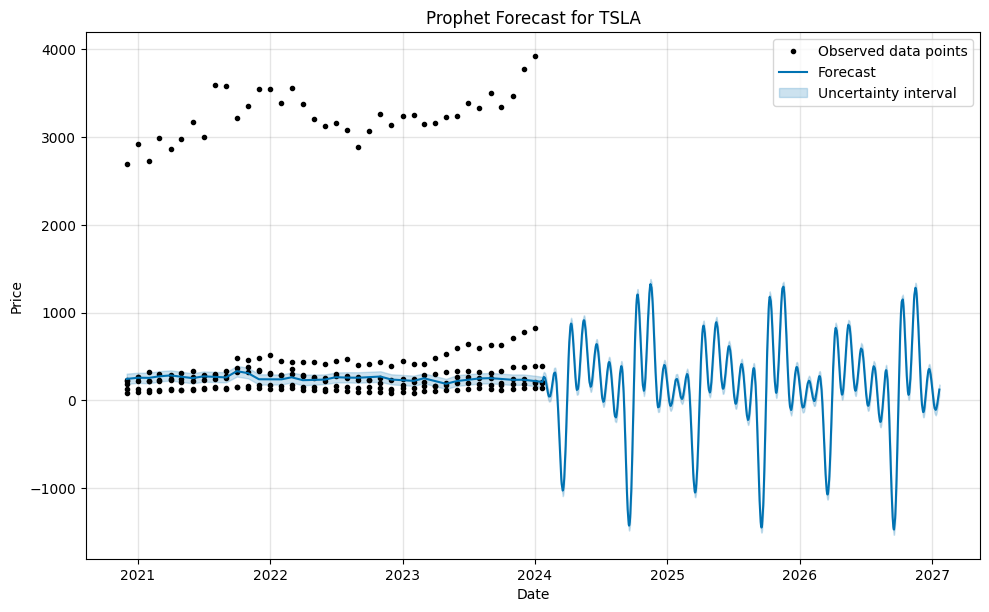

09:58:28 - cmdstanpy - INFO - Chain [1] start processing
09:58:29 - cmdstanpy - INFO - Chain [1] done processing


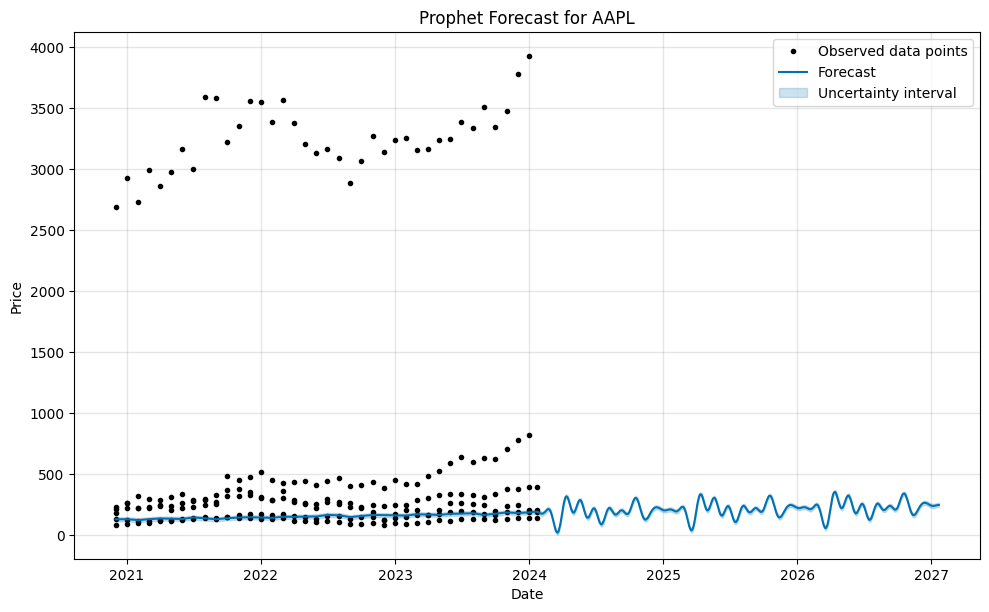

09:58:31 - cmdstanpy - INFO - Chain [1] start processing
09:58:31 - cmdstanpy - INFO - Chain [1] done processing


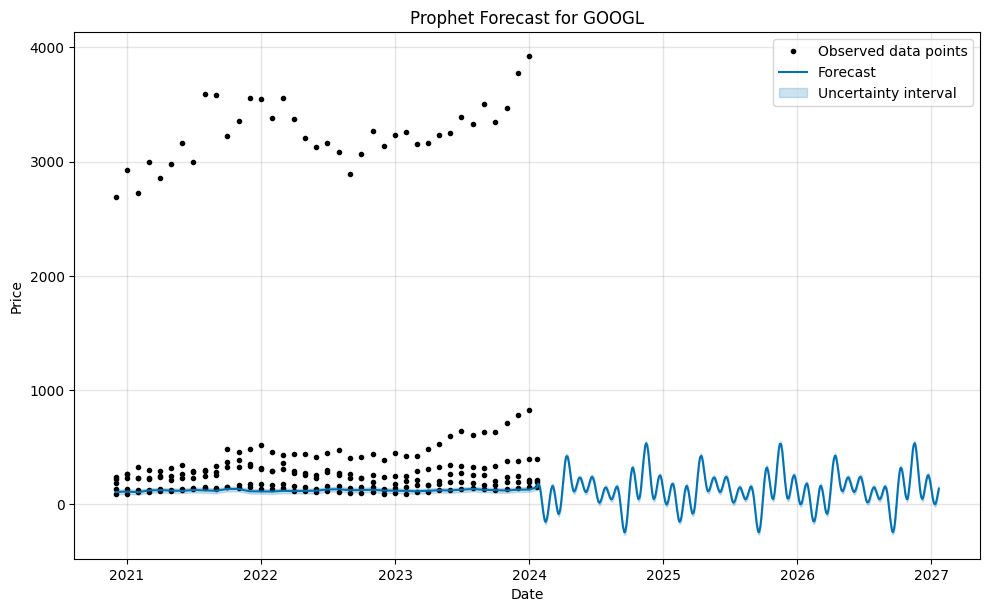

09:58:33 - cmdstanpy - INFO - Chain [1] start processing
09:58:34 - cmdstanpy - INFO - Chain [1] done processing


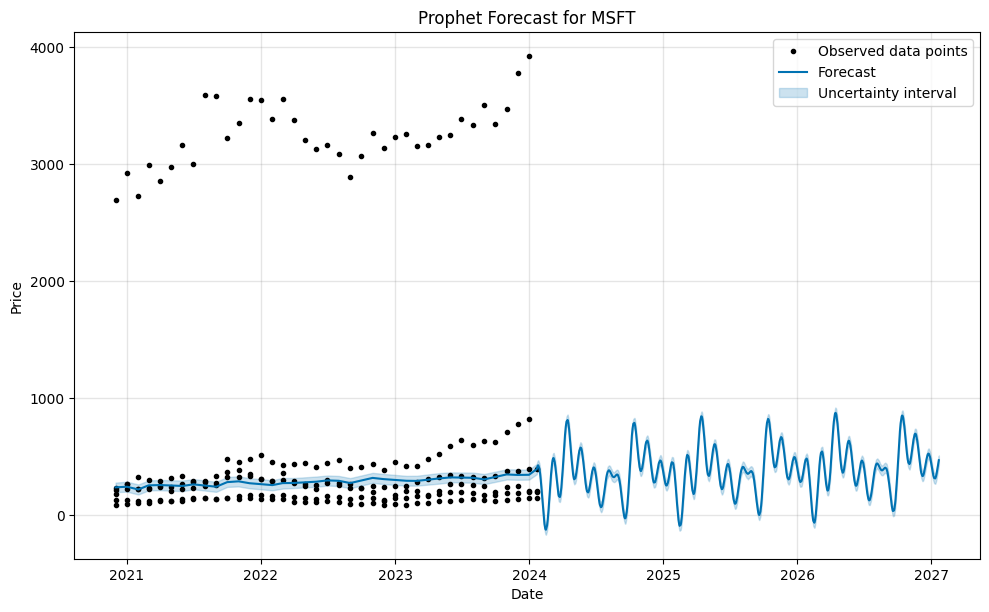

09:58:35 - cmdstanpy - INFO - Chain [1] start processing
09:58:36 - cmdstanpy - INFO - Chain [1] done processing


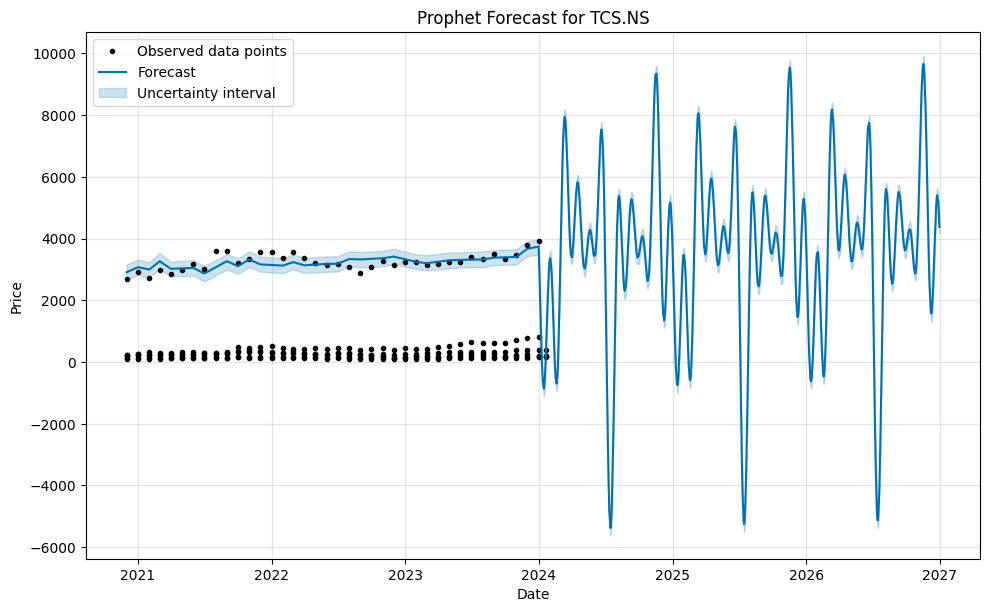

09:58:38 - cmdstanpy - INFO - Chain [1] start processing
09:58:38 - cmdstanpy - INFO - Chain [1] done processing


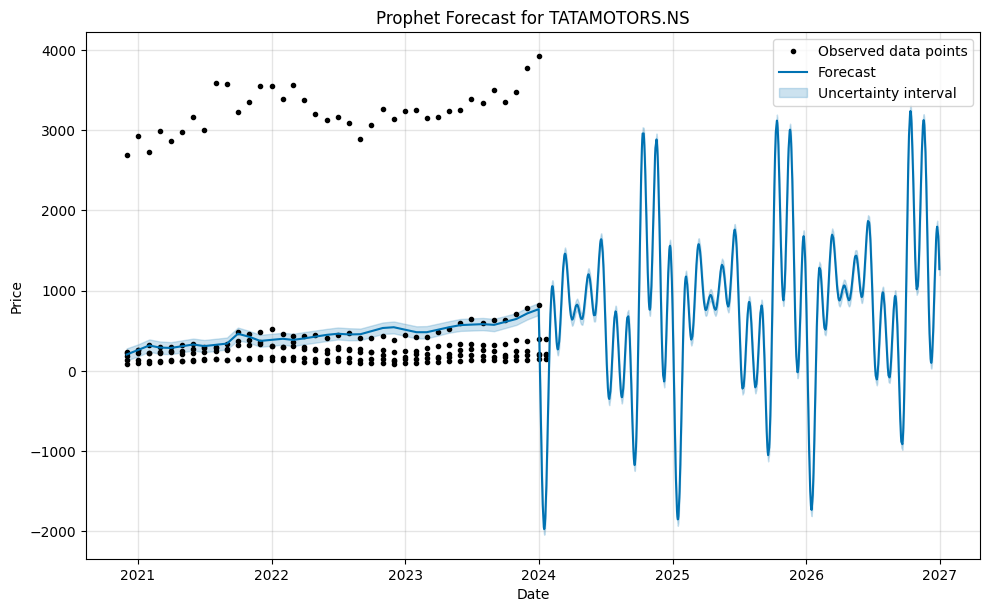

In [46]:
for i, ticker in enumerate(tickers):
    # Select the processed DataFrame for the current ticker
    stock_df = processed_dataframes[i]
    
    # Fit and predict using Prophet model
    forecast = fit_and_predict_prophet(stock_df)
    
    # Plot the forecast
    model.plot(forecast)
    plt.legend()
    plt.title(f'Prophet Forecast for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()


10:03:44 - cmdstanpy - INFO - Chain [1] start processing
10:03:45 - cmdstanpy - INFO - Chain [1] done processing


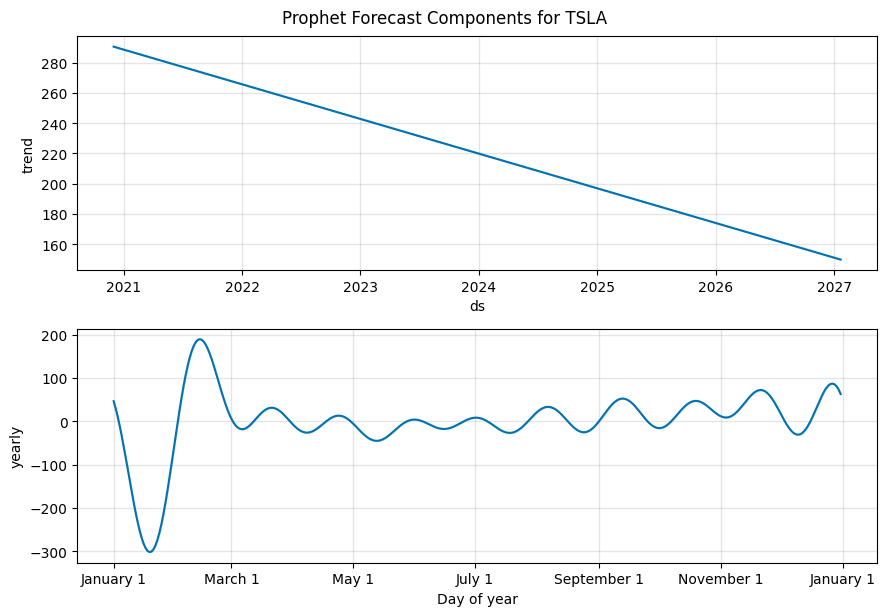

10:03:46 - cmdstanpy - INFO - Chain [1] start processing
10:03:47 - cmdstanpy - INFO - Chain [1] done processing


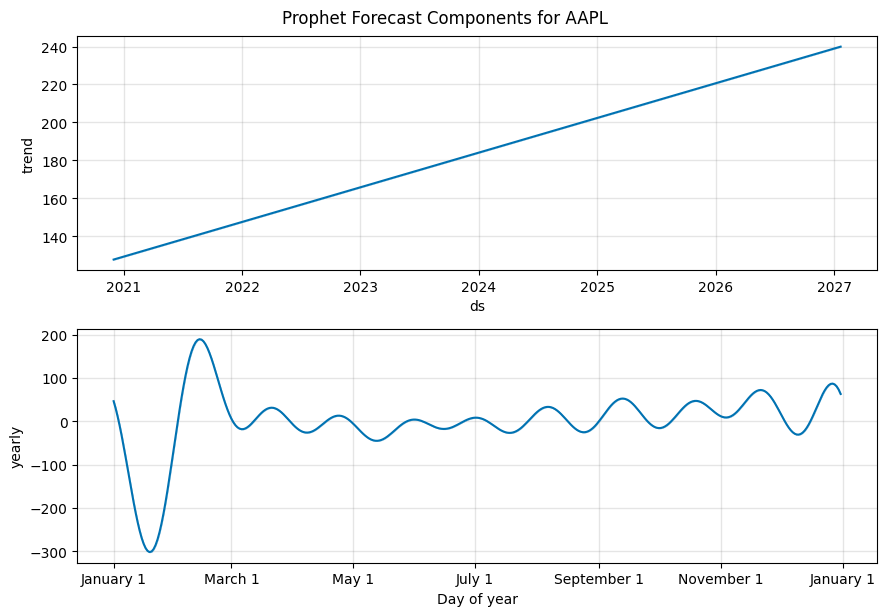

10:03:49 - cmdstanpy - INFO - Chain [1] start processing
10:03:49 - cmdstanpy - INFO - Chain [1] done processing


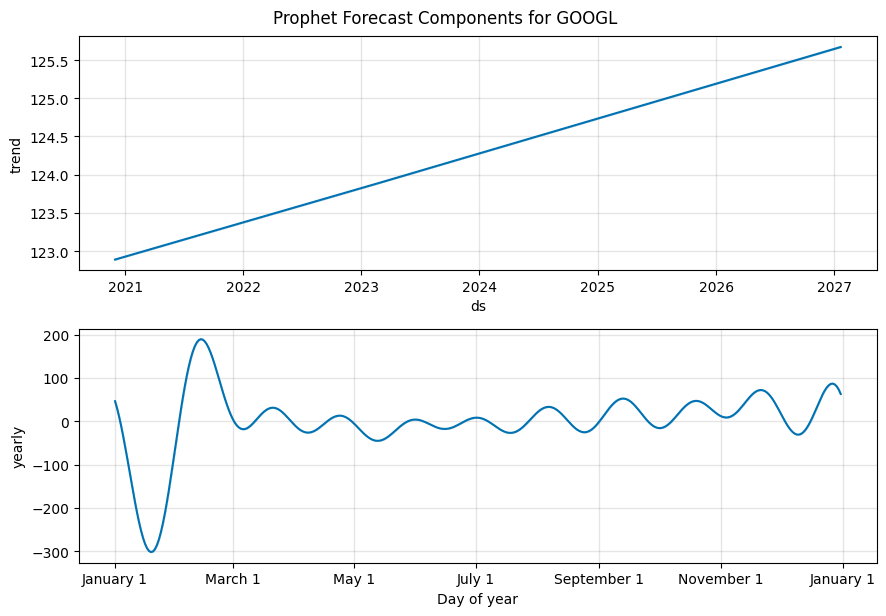

10:03:51 - cmdstanpy - INFO - Chain [1] start processing
10:03:51 - cmdstanpy - INFO - Chain [1] done processing


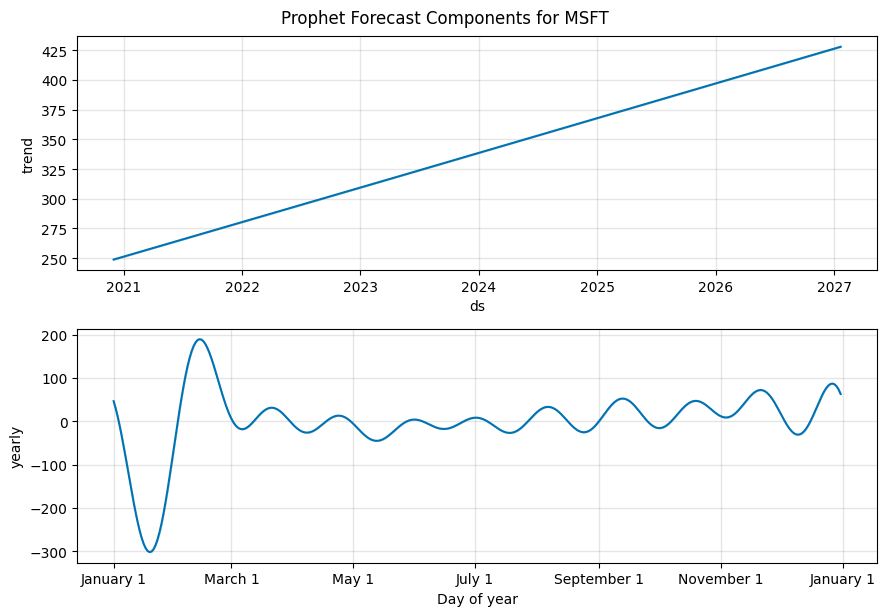

10:03:52 - cmdstanpy - INFO - Chain [1] start processing
10:03:53 - cmdstanpy - INFO - Chain [1] done processing


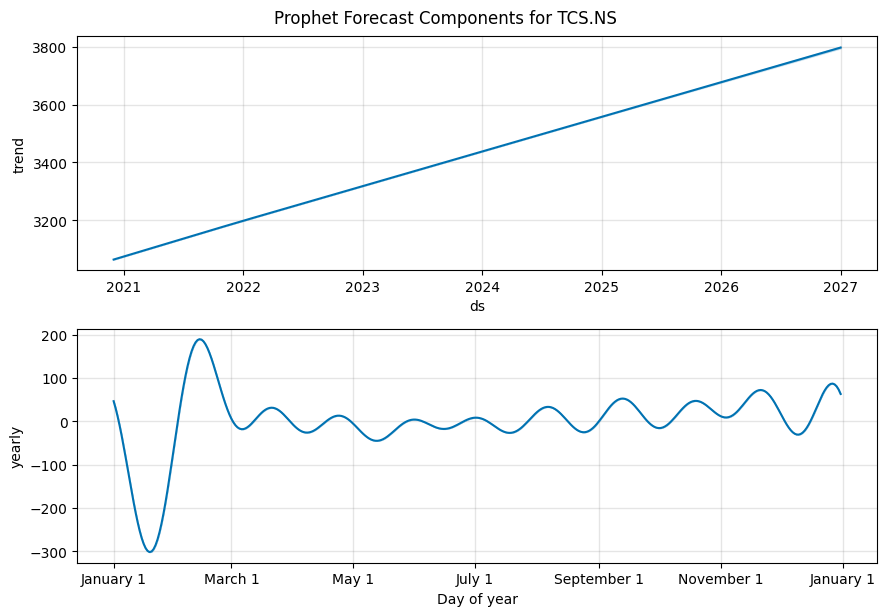

10:03:55 - cmdstanpy - INFO - Chain [1] start processing
10:03:56 - cmdstanpy - INFO - Chain [1] done processing


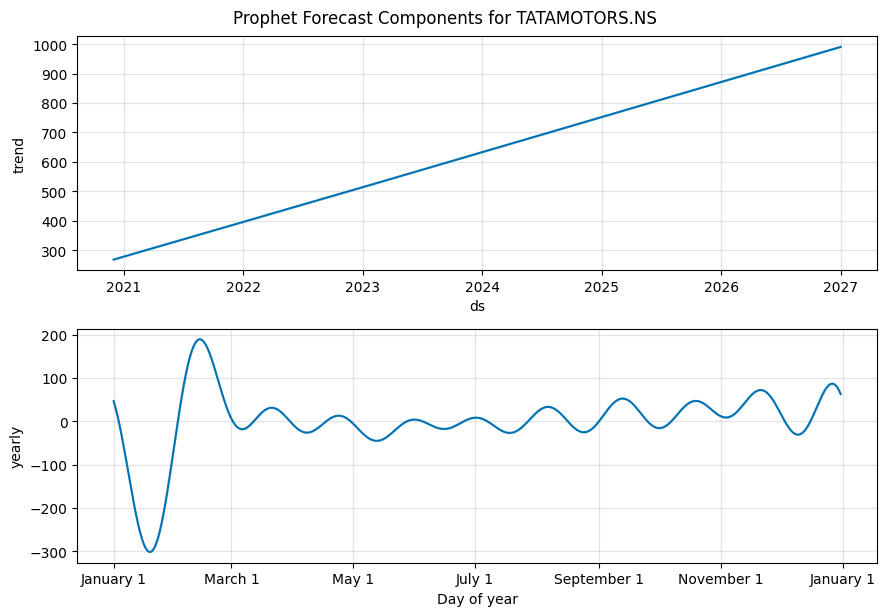

In [48]:
for i, ticker in enumerate(tickers):
    # Select the processed DataFrame for the current ticker
    stock_df = processed_dataframes[i]
    
    # Fit and predict using Prophet model
    forecast = fit_and_predict_prophet(stock_df)
    
    # Plot the forecast components
    model.plot_components(forecast)
    plt.suptitle(f'Prophet Forecast Components for {ticker}', y=1.02)
    plt.show()


10:06:21 - cmdstanpy - INFO - Chain [1] start processing
10:06:22 - cmdstanpy - INFO - Chain [1] done processing


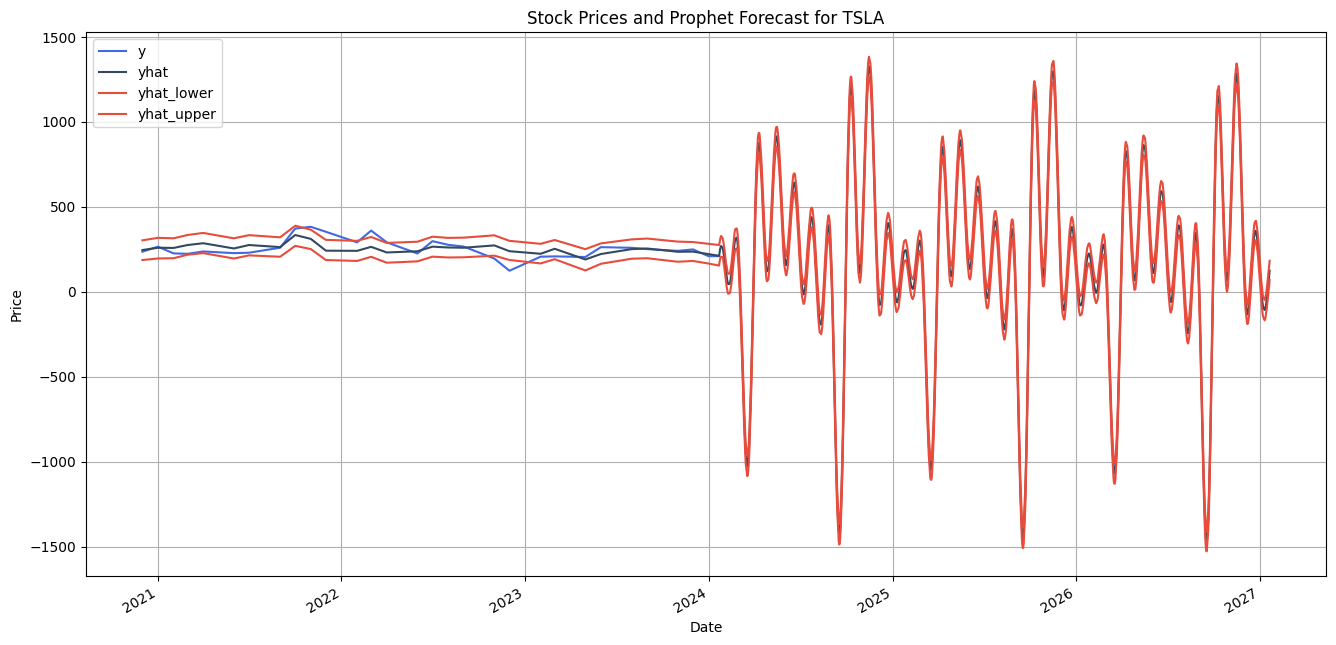

10:06:23 - cmdstanpy - INFO - Chain [1] start processing
10:06:24 - cmdstanpy - INFO - Chain [1] done processing


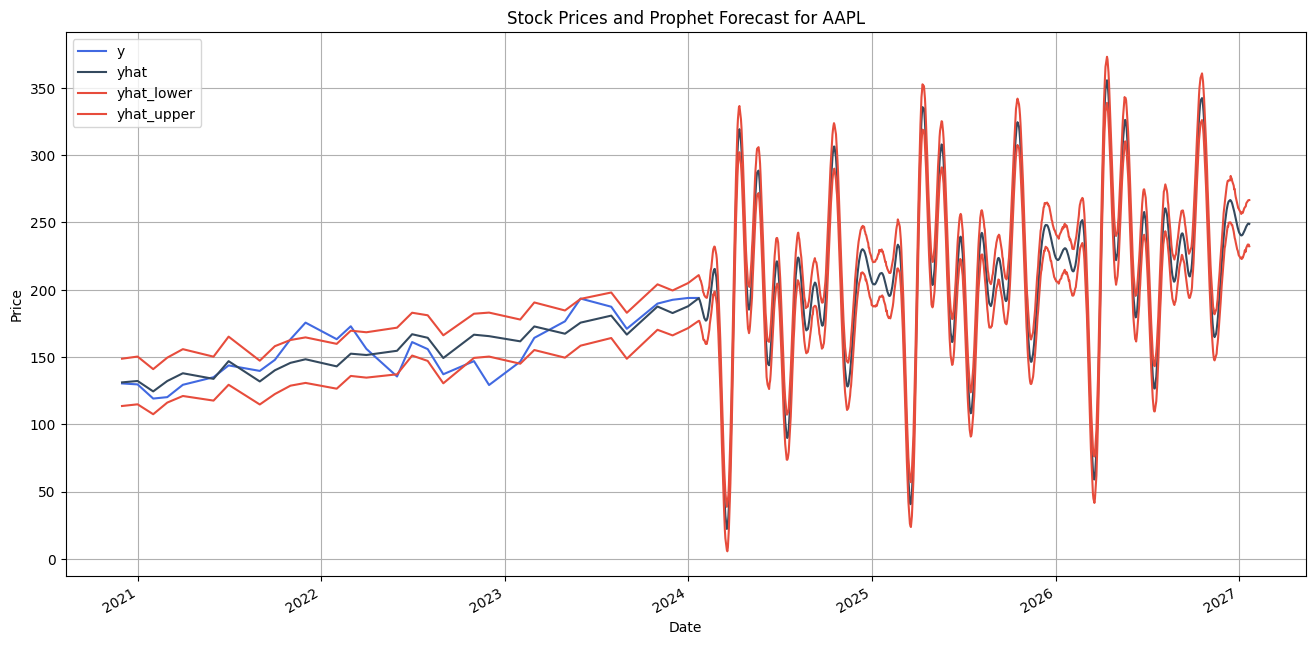

10:06:25 - cmdstanpy - INFO - Chain [1] start processing
10:06:26 - cmdstanpy - INFO - Chain [1] done processing


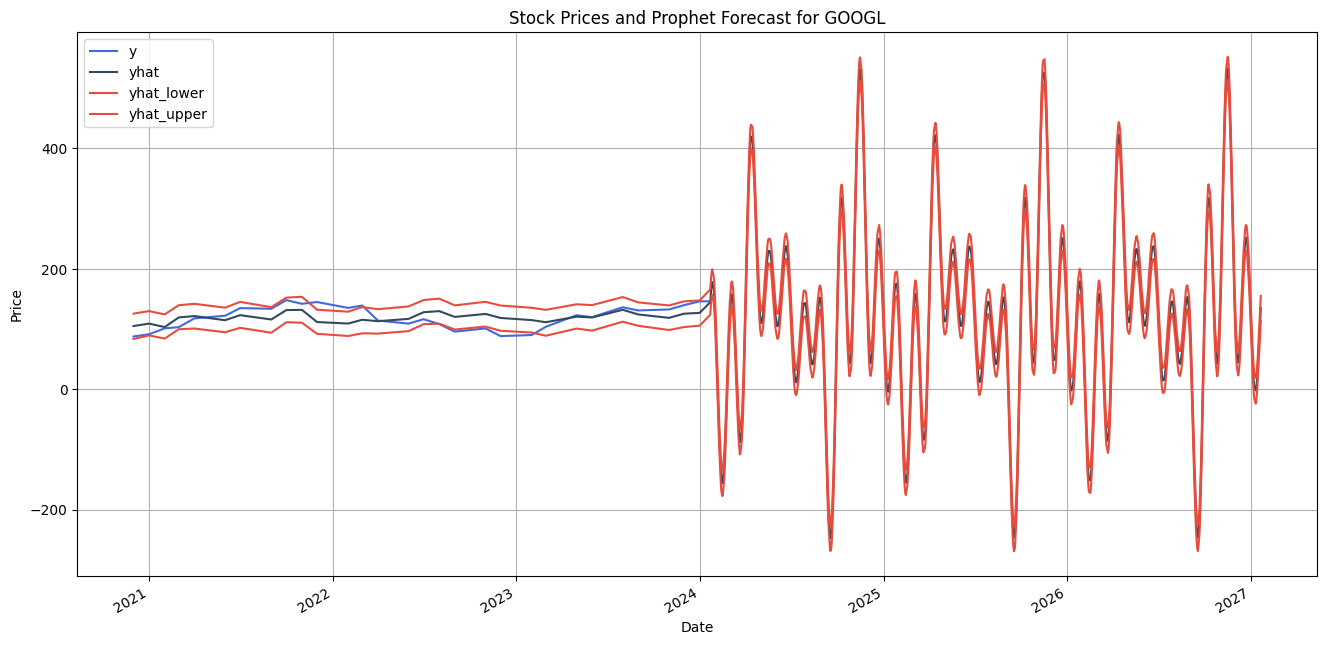

10:06:28 - cmdstanpy - INFO - Chain [1] start processing
10:06:29 - cmdstanpy - INFO - Chain [1] done processing


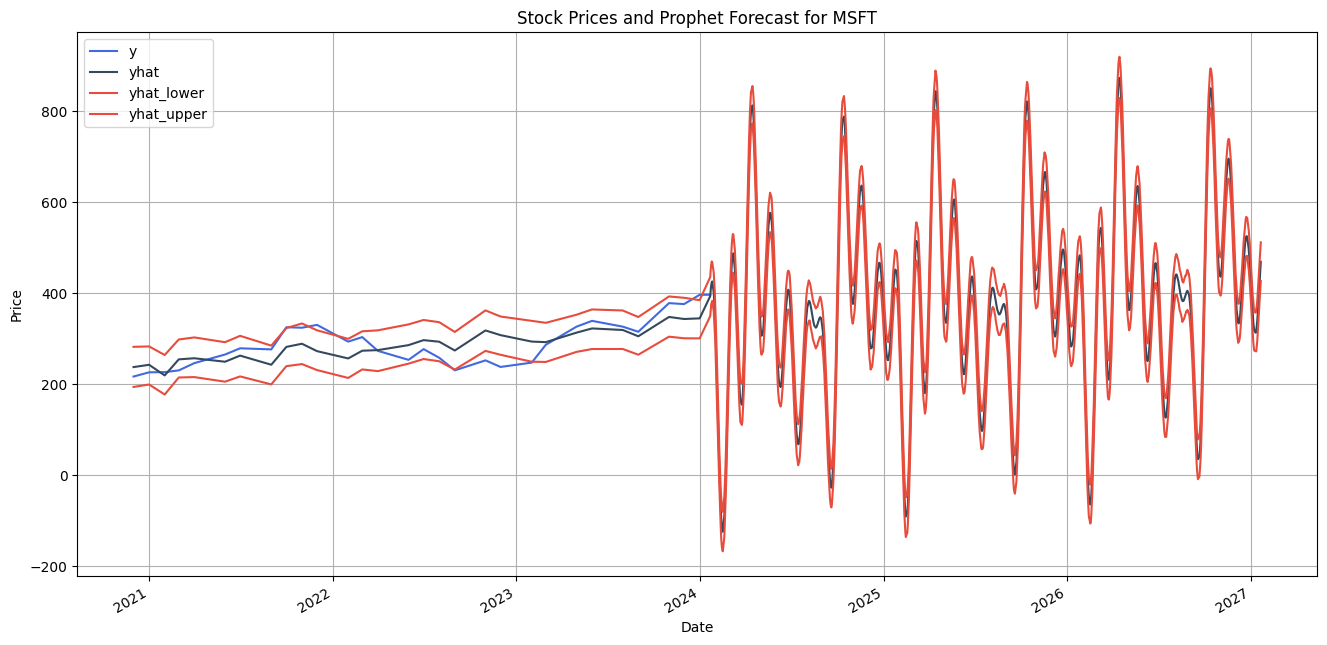

10:06:31 - cmdstanpy - INFO - Chain [1] start processing
10:06:32 - cmdstanpy - INFO - Chain [1] done processing


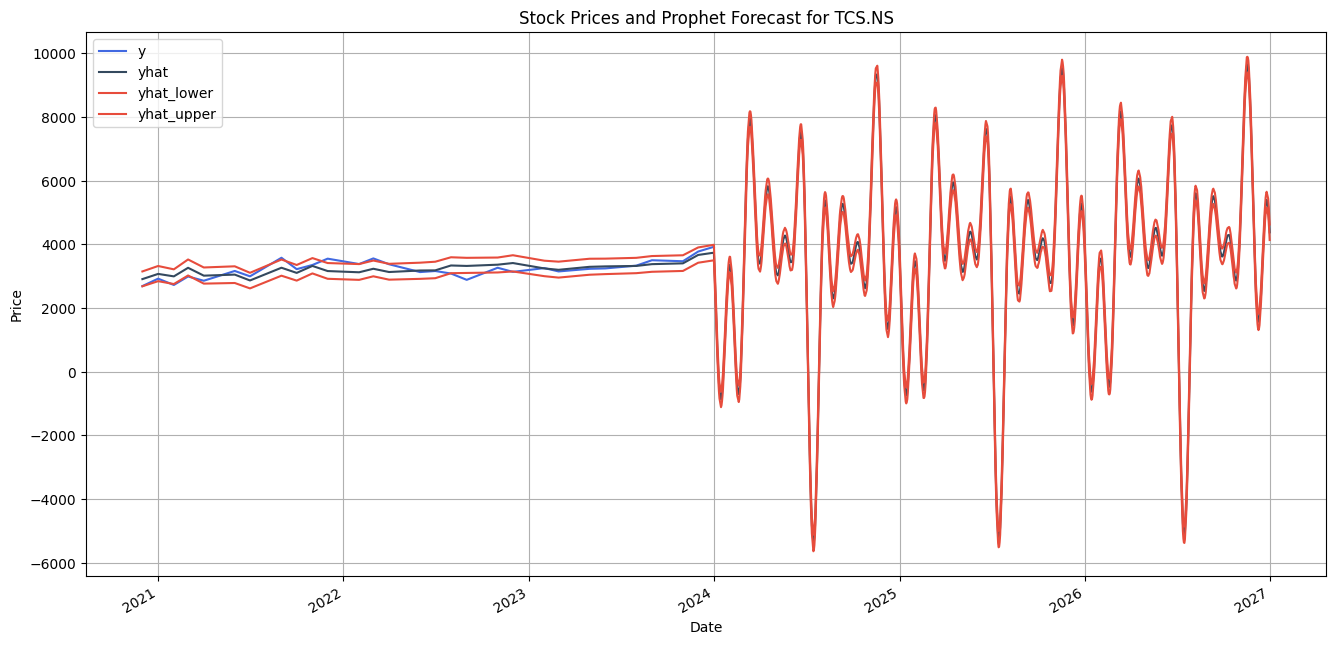

10:06:35 - cmdstanpy - INFO - Chain [1] start processing
10:06:35 - cmdstanpy - INFO - Chain [1] done processing


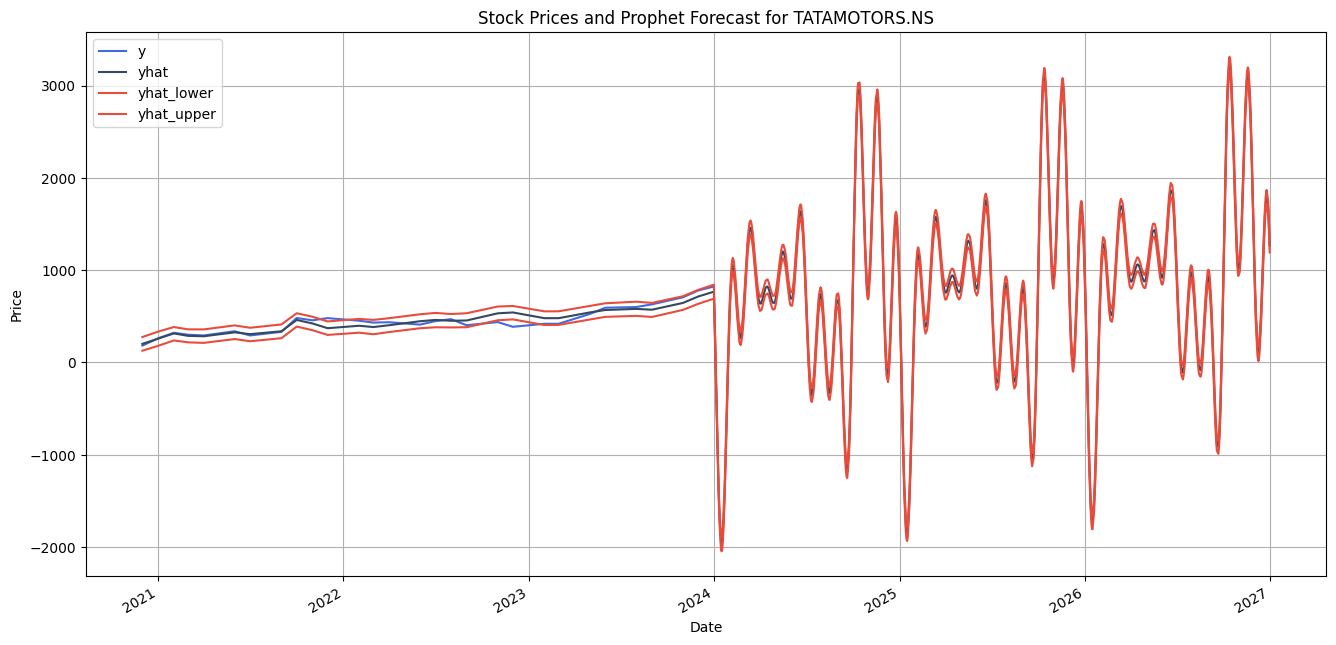

In [50]:
# Example usage
for i, ticker in enumerate(tickers):
    # Select the processed DataFrame for the current ticker
    stock_df = processed_dataframes[i]
    
    # Fit and predict using Prophet model
    forecast = fit_and_predict_prophet(stock_df)
    
    # Extract relevant columns from the forecast
    stock_price_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    # Convert 'ds' column to datetime64[ns] in both DataFrames
    stock_df['ds'] = pd.to_datetime(stock_df['ds'])
    stock_price_forecast['ds'] = pd.to_datetime(stock_price_forecast['ds'])
    
    # Merge the original stock prices with the forecast
    df = pd.merge(stock_df, stock_price_forecast, on='ds', how='right')
    
    # Plot the original stock prices and Prophet forecast
    df.set_index('ds').plot(figsize=(16, 8), color=['royalblue', "#34495e", "#e74c3c", "#e74c3c"], grid=True, title=f'Stock Prices and Prophet Forecast for {ticker}');
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()


In [51]:
for i, ticker in enumerate(tickers):
    # Select the processed DataFrame for the current ticker
    stock_df = processed_dataframes[i]

    # Extract date-related features
    stock_df['dayname'] = stock_df['ds'].dt.day_name()
    stock_df['month'] = stock_df['ds'].dt.month
    stock_df['year'] = stock_df['ds'].dt.year
    stock_df['month/year'] = stock_df['month'].astype(str) + '/' + stock_df['year'].astype(str)

    # Create a mapping for month/year to an index
    month_year_mapping = stock_df['month/year'].drop_duplicates().reset_index(drop=True).reset_index()

    # Merge the mapping with the original DataFrame
    stock_df = pd.merge(stock_df, month_year_mapping, on='month/year', how='left')

    # Rename the index column
    stock_df = stock_df.rename(columns={'index': 'month/year_index'})

    # Update the processed DataFrame in the list
    processed_dataframes[i] = stock_df


In [53]:
for i, ticker in enumerate(tickers):
    print(processed_dataframes[i].tail())

           ds      y    dayname  month  year month/year  month/year_index
34 2023-10-01 200.84     Sunday     10  2023    10/2023                34
35 2023-11-01 240.08  Wednesday     11  2023    11/2023                35
36 2023-12-01 248.48     Friday     12  2023    12/2023                36
37 2024-01-01 208.80     Monday      1  2024     1/2024                37
38 2024-01-22 208.80     Monday      1  2024     1/2024                37
           ds      y    dayname  month  year month/year  month/year_index
34 2023-10-01 170.55     Sunday     10  2023    10/2023                34
35 2023-11-01 189.70  Wednesday     11  2023    11/2023                35
36 2023-12-01 192.53     Friday     12  2023    12/2023                36
37 2024-01-01 193.89     Monday      1  2024     1/2024                37
38 2024-01-22 193.89     Monday      1  2024     1/2024                37
           ds      y    dayname  month  year month/year  month/year_index
34 2023-10-01 124.08     Sunday     10

In [55]:
forecast_frames_list = []

for i, ticker in enumerate(tickers):
    # Select the processed DataFrame for the current ticker
    stock_df = processed_dataframes[i]

    # Get unique month/year values for the current stock
    loop_list = stock_df['month/year'].unique().tolist()
    max_num = len(loop_list) - 1
    forecast_frames = []

    for num, item in enumerate(loop_list):
        if num == max_num:
            pass
        else:
            # Extract relevant data for the current month/year
            df = stock_df.set_index('ds')[
                 stock_df[stock_df['month/year'] == loop_list[0]]['ds'].min():\
                 stock_df[stock_df['month/year'] == item]['ds'].max()]

            df = df.reset_index()[['ds', 'y']]

            # Check if df has enough data points for Prophet model
            if len(df) >= 2:
                # Initialize and fit Prophet model
                model = Prophet()
                model.fit(df)

                # Create a future DataFrame for predictions
                future = stock_df[stock_df['month/year_index'] == (num + 1)][['ds']]
                forecast = model.predict(future)
                forecast_frames.append(forecast)

    forecast_frames_list.append(forecast_frames)


10:15:17 - cmdstanpy - INFO - Chain [1] start processing
10:15:19 - cmdstanpy - INFO - Chain [1] done processing
10:15:19 - cmdstanpy - INFO - Chain [1] start processing
10:15:19 - cmdstanpy - INFO - Chain [1] done processing
10:15:19 - cmdstanpy - INFO - Chain [1] start processing
10:15:19 - cmdstanpy - INFO - Chain [1] done processing
10:15:19 - cmdstanpy - INFO - Chain [1] start processing
10:15:19 - cmdstanpy - INFO - Chain [1] done processing
10:15:20 - cmdstanpy - INFO - Chain [1] start processing
10:15:20 - cmdstanpy - INFO - Chain [1] done processing
10:15:20 - cmdstanpy - INFO - Chain [1] start processing
10:15:20 - cmdstanpy - INFO - Chain [1] done processing
10:15:20 - cmdstanpy - INFO - Chain [1] start processing
10:15:21 - cmdstanpy - INFO - Chain [1] done processing
10:15:21 - cmdstanpy - INFO - Chain [1] start processing
10:15:21 - cmdstanpy - INFO - Chain [1] done processing
10:15:21 - cmdstanpy - INFO - Chain [1] start processing
10:15:21 - cmdstanpy - INFO - Chain [1]

In [56]:
from functools import reduce

for i, ticker in enumerate(tickers):
    # Concatenate forecast frames for the current stock
    stock_price_forecast = reduce(lambda top, bottom: pd.concat([top, bottom], sort=False), forecast_frames_list[i])
    
    # Select relevant columns
    stock_price_forecast = stock_price_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    # Save the forecast to a CSV file
    csv_filename = f'{ticker}_forecast.csv'
    stock_price_forecast.to_csv(csv_filename, index=False)


In [57]:
forecast_dataframes = []

for i, ticker in enumerate(tickers):
    # Read the forecast CSV file for the current stock
    csv_filename = f'{ticker}_forecast.csv'
    stock_price_forecast = pd.read_csv(csv_filename, parse_dates=['ds'])
    
    # Append the DataFrame to the list
    forecast_dataframes.append(stock_price_forecast)


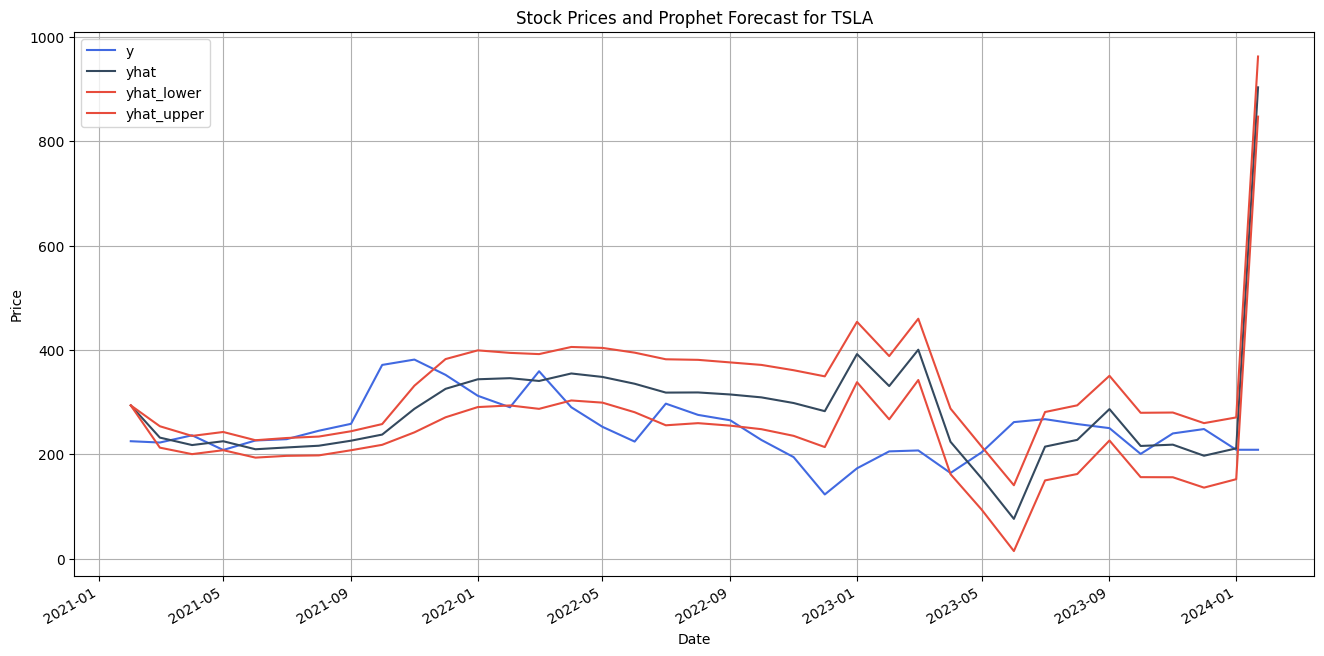

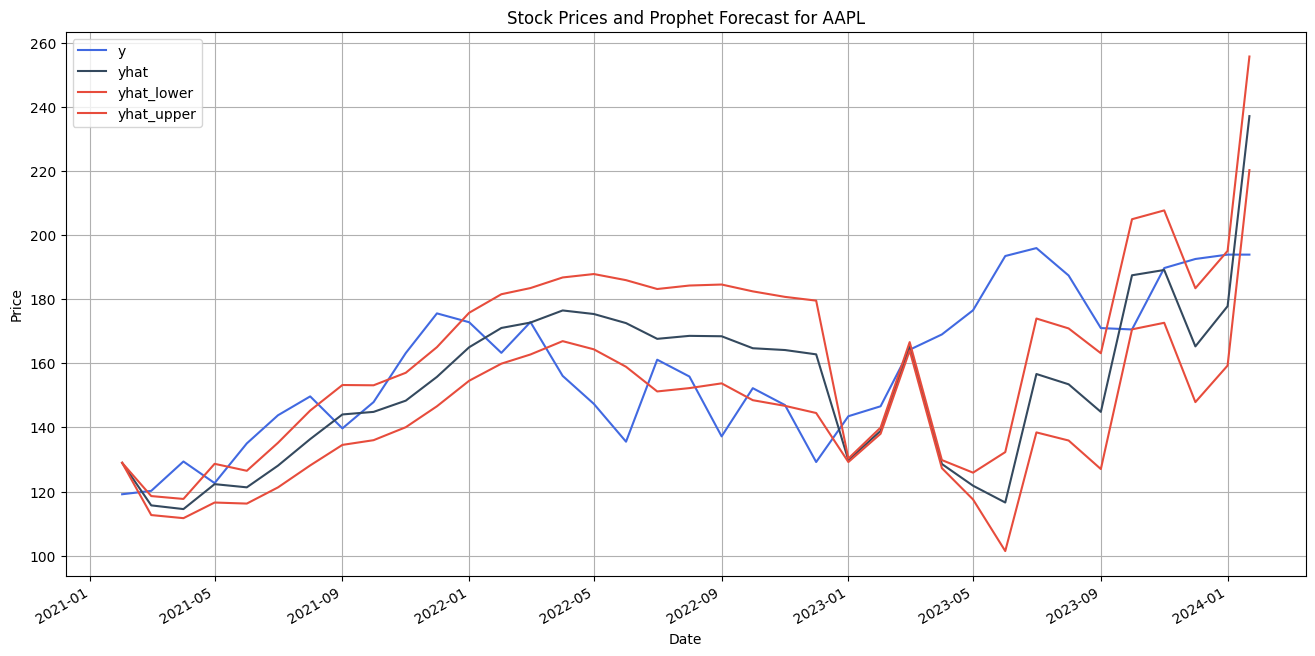

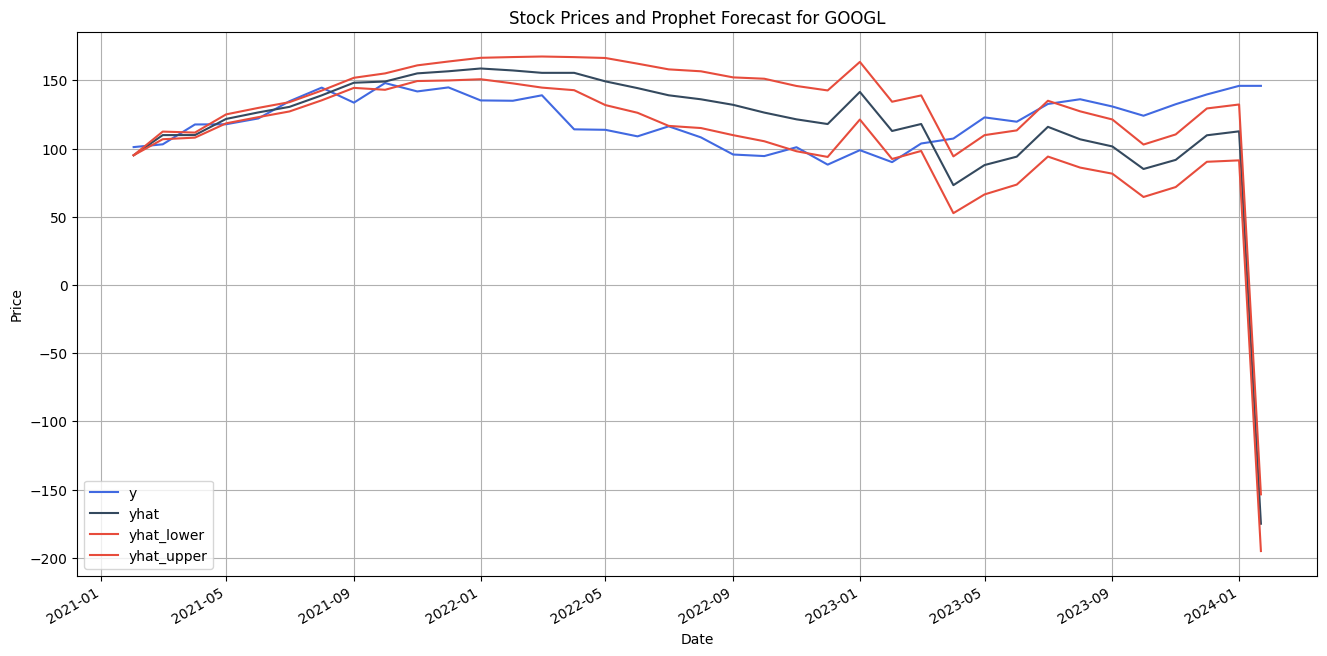

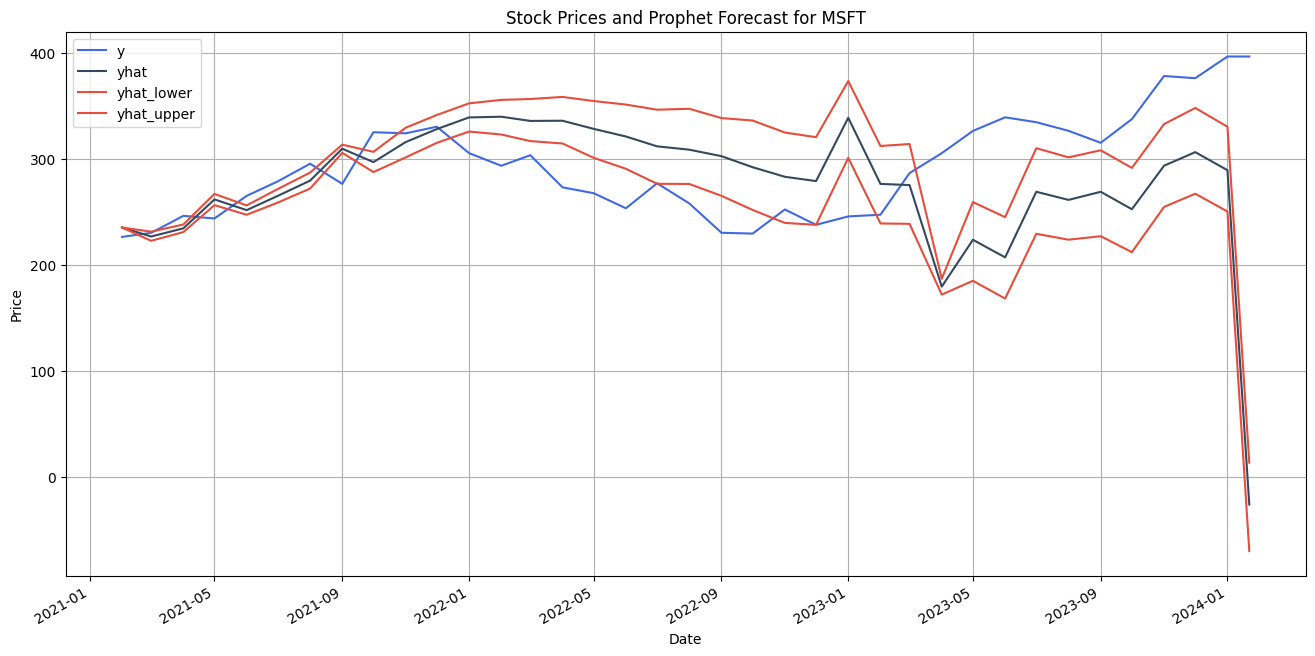

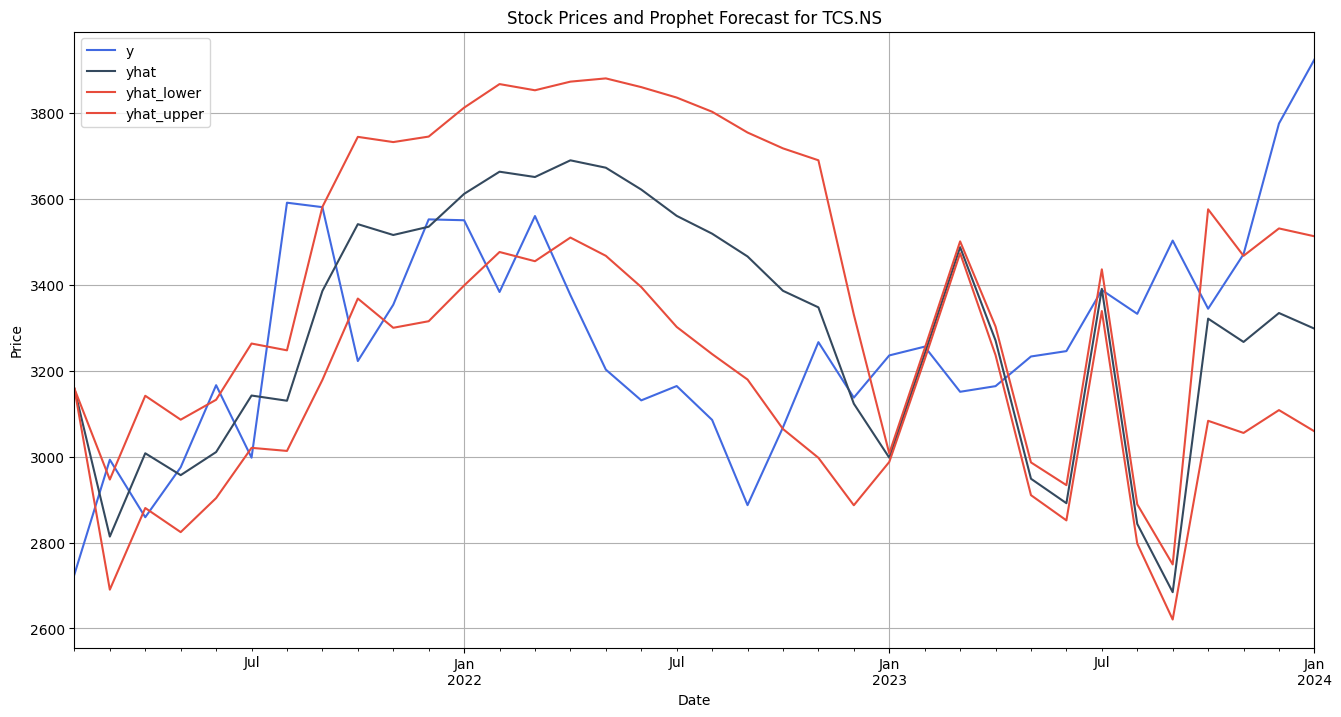

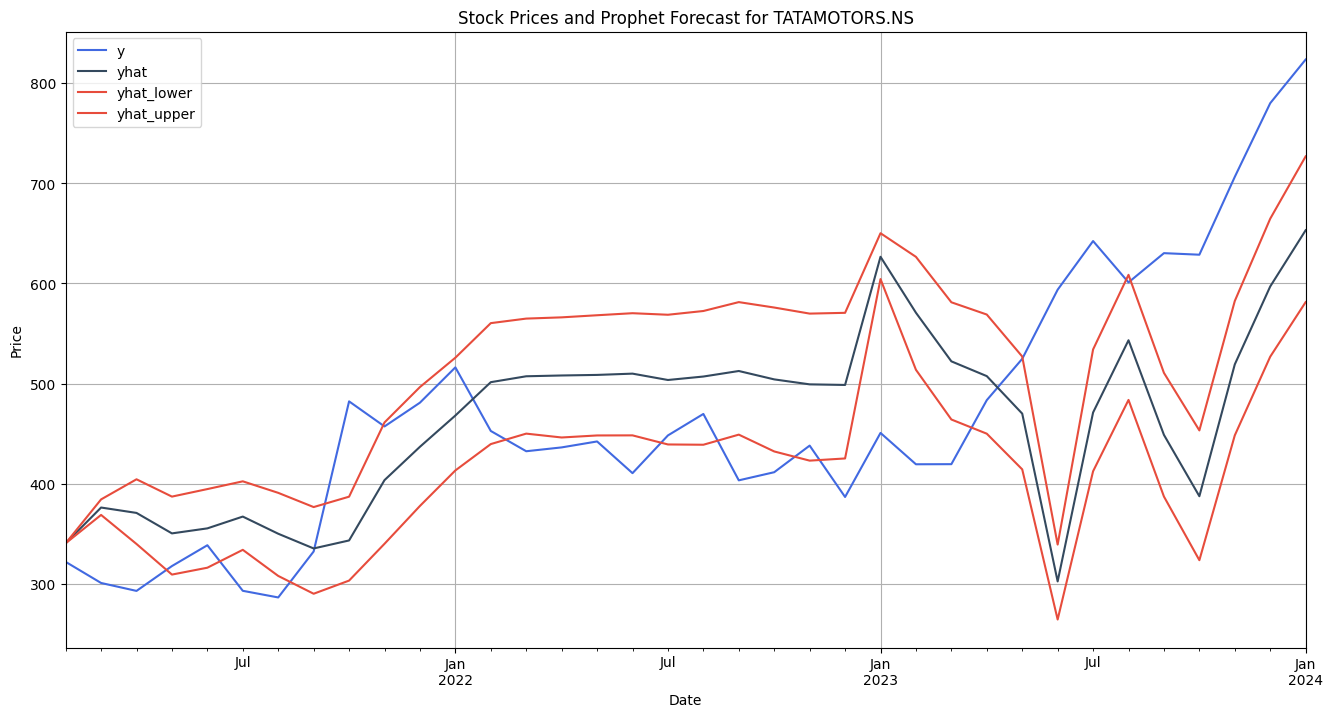

In [58]:
merged_dataframes = []

for i, ticker in enumerate(tickers):
    # Merge the original stock prices with the forecast for the current stock
    df = pd.merge(processed_dataframes[i][['ds', 'y', 'month/year_index']], forecast_dataframes[i], on='ds')

    # Calculate percent change
    df['Percent Change'] = df['y'].pct_change()

    # Plot the original stock prices and Prophet forecast
    df.set_index('ds')[['y', 'yhat', 'yhat_lower', 'yhat_upper']].plot(figsize=(16, 8), color=['royalblue', "#34495e", "#e74c3c", "#e74c3c"], grid=True, title=f'Stock Prices and Prophet Forecast for {ticker}');
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

    # Append the merged DataFrame to the list
    merged_dataframes.append(df)


In [59]:
for i, ticker in enumerate(tickers):
    # Display the first few rows of the merged DataFrame for the current stock
    print(f"\nMerged DataFrame for {ticker}:")
    print(merged_dataframes[i].head())



Merged DataFrame for TSLA:
          ds      y  month/year_index   yhat  yhat_lower  yhat_upper  \
0 2021-02-01 225.17                 2 293.80      293.80      293.80   
1 2021-03-01 222.64                 3 232.09      212.85      253.86   
2 2021-04-01 236.48                 4 217.81      200.41      235.30   
3 2021-05-01 208.41                 5 225.13      207.98      242.85   
4 2021-06-01 226.57                 6 209.77      193.75      227.05   

   Percent Change  
0             NaN  
1           -0.01  
2            0.06  
3           -0.12  
4            0.09  

Merged DataFrame for AAPL:
          ds      y  month/year_index   yhat  yhat_lower  yhat_upper  \
0 2021-02-01 119.16                 2 128.95      128.95      128.95   
1 2021-03-01 120.21                 3 115.68      112.66      118.59   
2 2021-04-01 129.37                 4 114.53      111.70      117.69   
3 2021-05-01 122.63                 5 122.31      116.57      128.64   
4 2021-06-01 135.01            